In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [82]:
n = 200
step_size = 1.0
k = 50000

In [83]:
chain = np.zeros((3, n))
chain[:, 0] = [0, 0, 0]
end_to_end_array = np.zeros(k)

In [84]:
for i in range(k):
    chain = np.zeros((3, n))
    chain[:, 0] = [0, 0, 0]

    for j in range(1, n):
        accept = False
        while not accept:
            step = np.random.uniform(-1, 1, size=3) * 1.0
            new_pos = chain[:, j-1] + step

            if np.min(np.sum((chain[:, :j] - new_pos[:, np.newaxis])**2, axis=0)) > 1.0:
                chain[:, j] = new_pos
                accept = True
    end_to_end_array[i] = np.linalg.norm(chain[:, -1] - chain[:, 0])
    end_to_end_array[i] /= n

In [85]:
counts, bins, _ = plt.hist(end_to_end_array, bins=50, density=True)
plt.clf()

bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]

prob_dist = counts

s = 0
for i in range(len(prob_dist)):
    s += prob_dist[i] * ((bins[i] + bins[i+1]) / 2) 
f = s / np.sum(prob_dist)

e = 0
for i in range(len(prob_dist)):
    e += prob_dist[i] * ((bins[i] + bins[i+1]) / 2)**2
secmom = e / np.sum(prob_dist)

chi = n * secmom

<Figure size 640x480 with 0 Axes>

In [86]:
import scipy.integrate as integrate

def clt(x):
    return (x**2) * np.exp(-n * (3/(2*chi)) * x**2)

p = integrate.quad(lambda x: clt(x), 0, 1, full_output=1)[0]

def newClt(x):
    return (1/p) * clt(x)

In [93]:
#be = 4.067 #n=100
be = 4.187 #n=200
#be = 4.166 #n=250
delta = 3/chi - 2
w = 0.25*(delta + be - 0.5)


def Pade(x):
    return 4*np.pi*(x**2) * ((1-x**2)**n) * np.exp(-n*(delta/2)*(x**2)) * np.exp(n*w*x**4)

r = integrate.quad(lambda x: Pade(x), 0, 1, full_output=1)[0]

def Normed(x):
    return (1/r) * Pade(x)

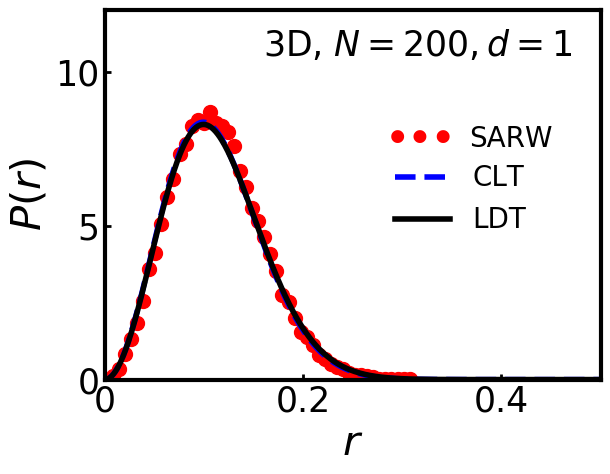

In [118]:
plt.plot(bin_centers, prob_dist, marker='o', markersize=10, linestyle='None', color='red')
z = np.arange(0,1,0.001)
plt.plot(z, newClt(z), lw=4, color='blue', label='CLT', linestyle='dashed')
plt.plot(z, Normed(z), lw=4, color='black', label='LDT')

ax = plt.gca()  # Get the current axes
line_width = 3
ax.spines['top'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
ax.spines['right'].set_linewidth(line_width)
plt.ylim(0, 12)
plt.xlim(0, 0.5)
plt.xlabel(r'$r$', fontsize='30')
plt.ylabel(r'$P(r)$', fontsize='30')

plt.xticks(ticks=[0, 0.2, 0.4], labels=['0', '0.2', '0.4'])
plt.yticks(ticks=[0, 5, 10])

plt.text(0.16, 10.5, r'3D, $N=200, d=1$', fontsize=25)
plt.text(0.283, 7.8, '\u26AB\u26AB\u26AB', color='red', fontsize=20, va='center')
plt.text(0.367, 7.8, 'SARW', color='black', fontsize=20, va='center')

plt.legend(bbox_to_anchor=(0.9, 0.65), prop={'size': 20}, frameon=False)
plt.tick_params(labelsize=25)
plt.tick_params(which='major', length=4, width=2, direction='in')
plt.savefig('./sarw.jpeg', dpi=300, bbox_inches='tight')

/home/lefterman/.conda/envs/dev-py2/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/lefterman/.conda/envs/dev-py2/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == "__main__":


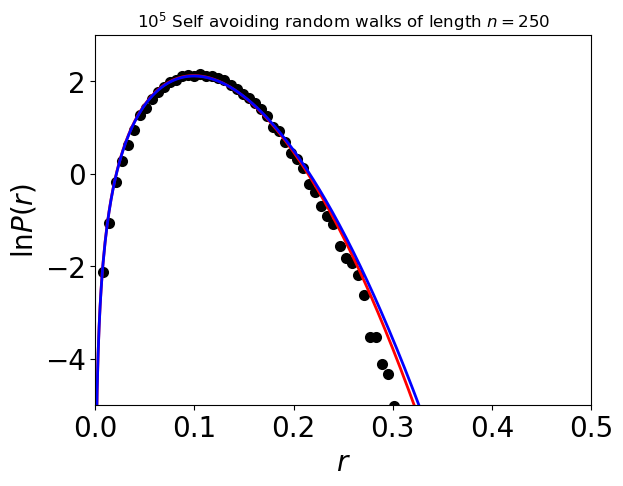

In [90]:
exactRate = np.log(prob_dist)
plt.scatter(bin_centers, exactRate, lw=2, color='black', label='SARW')

def cltrate(x):
    return np.log(newClt(x))
plt.plot(z, cltrate(z), lw=2, color='red', label='cental limit')

def paderate(x):
    return np.log(Normed(x))
plt.plot(z, paderate(z), lw=2, color='blue', label='pade')


plt.ylim(-5, 3)
plt.xlim(0, 0.5)
plt.xlabel(r'$r$', fontsize='20')
plt.ylabel(r'$\ln{P(r)}$', fontsize='20')
plt.title(r'$10^5$ Self avoiding random walks of length $n=250$')


#plt.legend(loc='upper left', prop={'size': 16})
plt.tick_params(labelsize=20)
#plt.show()
#plt.savefig('./sarw.pdf', transparent=True, bbox_inches='tight')

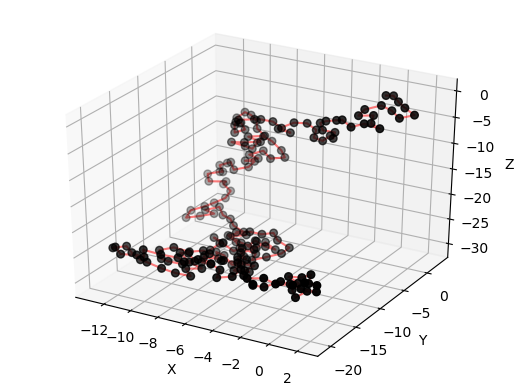

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(chain[0,:], chain[1,:], chain[2,:], c='r', alpha=0.5)
ax.scatter(chain[0,:], chain[1,:], chain[2,:], c='k', s=30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [92]:
root = []
axis = []

delta = 3/chi - 2

for a in range(2060, 5080, 1):

    be = a/1000
    
    axis.append(be)
    
    w = 0.25*(delta + be - 0.5)
    
    def Pade(x):
        return (x**2) * ((1-x**2)**n) * np.exp(-(n/2)*(delta)*(x**2)) * np.exp(n*w*x**4)

    r = integrate.quad(lambda x: Pade(x), 0, 1, full_output=1)[0]

    def Normed(x):
        return (1/r) * Pade(x)

    int = integrate.quad(lambda x: x*Normed(x), 0, 1, full_output=1)[0]
    
    diff = abs(int-f)
    root.append(diff)
    print('be:', be, '<Q>_num:', int, '<Q>_sim-<Q>_num:', diff) 

be: 2.06 <Q>_num: 0.11038260733682088 <Q>_sim-<Q>_num: 0.002511907663313176
be: 2.061 <Q>_num: 0.11038368290493131 <Q>_sim-<Q>_num: 0.002510832095202753
be: 2.062 <Q>_num: 0.11038475855888914 <Q>_sim-<Q>_num: 0.0025097564412449175
be: 2.063 <Q>_num: 0.11038583429870963 <Q>_sim-<Q>_num: 0.0025086807014244317
be: 2.064 <Q>_num: 0.11038691012440828 <Q>_sim-<Q>_num: 0.00250760487572578
be: 2.065 <Q>_num: 0.11038798603600045 <Q>_sim-<Q>_num: 0.002506528964133614
be: 2.066 <Q>_num: 0.11038906203350161 <Q>_sim-<Q>_num: 0.002505452966632446
be: 2.067 <Q>_num: 0.11039013811692715 <Q>_sim-<Q>_num: 0.002504376883206913
be: 2.068 <Q>_num: 0.11039121428629248 <Q>_sim-<Q>_num: 0.002503300713841583
be: 2.069 <Q>_num: 0.11039229054161309 <Q>_sim-<Q>_num: 0.0025022244585209685
be: 2.07 <Q>_num: 0.11039336688290437 <Q>_sim-<Q>_num: 0.002501148117229693
be: 2.071 <Q>_num: 0.11039444331018178 <Q>_sim-<Q>_num: 0.0025000716899522823
be: 2.072 <Q>_num: 0.11039551982346073 <Q>_sim-<Q>_num: 0.00249899517667333

be: 2.397 <Q>_num: 0.11075003400944046 <Q>_sim-<Q>_num: 0.0021444809906936008
be: 2.398 <Q>_num: 0.11075113941039283 <Q>_sim-<Q>_num: 0.002143375589741231
be: 2.399 <Q>_num: 0.11075224490265742 <Q>_sim-<Q>_num: 0.0021422700974766395
be: 2.4 <Q>_num: 0.11075335048625119 <Q>_sim-<Q>_num: 0.0021411645138828678
be: 2.401 <Q>_num: 0.11075445616119128 <Q>_sim-<Q>_num: 0.0021400588389427766
be: 2.402 <Q>_num: 0.11075556192749475 <Q>_sim-<Q>_num: 0.0021389530726393102
be: 2.403 <Q>_num: 0.1107566677851787 <Q>_sim-<Q>_num: 0.0021378472149553573
be: 2.404 <Q>_num: 0.1107577737342603 <Q>_sim-<Q>_num: 0.002136741265873765
be: 2.405 <Q>_num: 0.11075887977475653 <Q>_sim-<Q>_num: 0.002135635225377533
be: 2.406 <Q>_num: 0.11075998590668454 <Q>_sim-<Q>_num: 0.002134529093449522
be: 2.407 <Q>_num: 0.11076109213006147 <Q>_sim-<Q>_num: 0.0021334228700725932
be: 2.408 <Q>_num: 0.11076219844490444 <Q>_sim-<Q>_num: 0.0021323165552296214
be: 2.409 <Q>_num: 0.11076330485123052 <Q>_sim-<Q>_num: 0.00213121014890

be: 2.738 <Q>_num: 0.11113238399973613 <Q>_sim-<Q>_num: 0.0017621310003979318
be: 2.739 <Q>_num: 0.11113352156434453 <Q>_sim-<Q>_num: 0.0017609934357895318
be: 2.74 <Q>_num: 0.11113465922641397 <Q>_sim-<Q>_num: 0.0017598557737200926
be: 2.741 <Q>_num: 0.11113579698596353 <Q>_sim-<Q>_num: 0.0017587180141705322
be: 2.742 <Q>_num: 0.11113693484301226 <Q>_sim-<Q>_num: 0.0017575801571217964
be: 2.743 <Q>_num: 0.11113807279757923 <Q>_sim-<Q>_num: 0.001756442202554831
be: 2.744 <Q>_num: 0.11113921084968341 <Q>_sim-<Q>_num: 0.0017553041504506511
be: 2.745 <Q>_num: 0.11114034899934402 <Q>_sim-<Q>_num: 0.0017541660007900362
be: 2.746 <Q>_num: 0.11114148724658005 <Q>_sim-<Q>_num: 0.001753027753554015
be: 2.747 <Q>_num: 0.11114262559141061 <Q>_sim-<Q>_num: 0.0017518894087234504
be: 2.748 <Q>_num: 0.11114376403385474 <Q>_sim-<Q>_num: 0.0017507509662793158
be: 2.749 <Q>_num: 0.11114490257393167 <Q>_sim-<Q>_num: 0.0017496124262023904
be: 2.75 <Q>_num: 0.11114604121166036 <Q>_sim-<Q>_num: 0.0017484737

be: 3.034 <Q>_num: 0.11147344179337047 <Q>_sim-<Q>_num: 0.0014210732067635873
be: 3.035 <Q>_num: 0.11147460906586701 <Q>_sim-<Q>_num: 0.0014199059342670517
be: 3.036 <Q>_num: 0.11147577644174989 <Q>_sim-<Q>_num: 0.001418738558384175
be: 3.037 <Q>_num: 0.11147694392104009 <Q>_sim-<Q>_num: 0.0014175710790939738
be: 3.038 <Q>_num: 0.1114781115037587 <Q>_sim-<Q>_num: 0.0014164034963753541
be: 3.039 <Q>_num: 0.11147927918992685 <Q>_sim-<Q>_num: 0.0014152358102072077
be: 3.04 <Q>_num: 0.11148044697956543 <Q>_sim-<Q>_num: 0.0014140680205686346
be: 3.041 <Q>_num: 0.11148161487269562 <Q>_sim-<Q>_num: 0.0014129001274384434
be: 3.042 <Q>_num: 0.11148278286933853 <Q>_sim-<Q>_num: 0.001411732130795526
be: 3.043 <Q>_num: 0.1114839509695152 <Q>_sim-<Q>_num: 0.0014105640306188577
be: 3.044 <Q>_num: 0.11148511917324666 <Q>_sim-<Q>_num: 0.0014093958268873996
be: 3.045 <Q>_num: 0.1114862874805542 <Q>_sim-<Q>_num: 0.0014082275195798633
be: 3.046 <Q>_num: 0.11148745589145877 <Q>_sim-<Q>_num: 0.001407059108

be: 3.298 <Q>_num: 0.11178525616590924 <Q>_sim-<Q>_num: 0.001109258834224816
be: 3.299 <Q>_num: 0.1117864514856771 <Q>_sim-<Q>_num: 0.0011080635144569556
be: 3.3 <Q>_num: 0.1117876469146502 <Q>_sim-<Q>_num: 0.001106868085483867
be: 3.301 <Q>_num: 0.11178884245285169 <Q>_sim-<Q>_num: 0.0011056725472823742
be: 3.302 <Q>_num: 0.11179003810030452 <Q>_sim-<Q>_num: 0.0011044768998295373
be: 3.303 <Q>_num: 0.11179123385703194 <Q>_sim-<Q>_num: 0.001103281143102125
be: 3.304 <Q>_num: 0.11179242972305699 <Q>_sim-<Q>_num: 0.0011020852770770723
be: 3.305 <Q>_num: 0.1117936256984029 <Q>_sim-<Q>_num: 0.0011008893017311616
be: 3.306 <Q>_num: 0.11179482178309266 <Q>_sim-<Q>_num: 0.0010996932170413976
be: 3.307 <Q>_num: 0.11179601797714958 <Q>_sim-<Q>_num: 0.0010984970229844793
be: 3.308 <Q>_num: 0.11179721428059666 <Q>_sim-<Q>_num: 0.0010973007195373974
be: 3.309 <Q>_num: 0.11179841069345714 <Q>_sim-<Q>_num: 0.0010961043066769205
be: 3.31 <Q>_num: 0.11179960721575417 <Q>_sim-<Q>_num: 0.001094907784379

be: 3.552 <Q>_num: 0.1120924400397877 <Q>_sim-<Q>_num: 0.0008020749603463578
be: 3.553 <Q>_num: 0.1120936638629642 <Q>_sim-<Q>_num: 0.000800851137169864
be: 3.554 <Q>_num: 0.11209488780149171 <Q>_sim-<Q>_num: 0.0007996271986423498
be: 3.555 <Q>_num: 0.11209611185539578 <Q>_sim-<Q>_num: 0.00079840314473828
be: 3.556 <Q>_num: 0.11209733602470158 <Q>_sim-<Q>_num: 0.0007971789754324804
be: 3.557 <Q>_num: 0.11209856030943456 <Q>_sim-<Q>_num: 0.0007959546906994991
be: 3.558 <Q>_num: 0.11209978470962012 <Q>_sim-<Q>_num: 0.0007947302905139397
be: 3.559 <Q>_num: 0.11210100922528367 <Q>_sim-<Q>_num: 0.0007935057748503921
be: 3.56 <Q>_num: 0.1121022338564506 <Q>_sim-<Q>_num: 0.0007922811436834598
be: 3.561 <Q>_num: 0.11210345860314634 <Q>_sim-<Q>_num: 0.0007910563969877188
be: 3.562 <Q>_num: 0.11210468346539629 <Q>_sim-<Q>_num: 0.0007898315347377727
be: 3.563 <Q>_num: 0.1121059084432259 <Q>_sim-<Q>_num: 0.0007886065569081557
be: 3.564 <Q>_num: 0.11210713353666063 <Q>_sim-<Q>_num: 0.00078738146347

be: 3.826 <Q>_num: 0.11243217009648342 <Q>_sim-<Q>_num: 0.00046234490365064385
be: 3.827 <Q>_num: 0.11243342650803897 <Q>_sim-<Q>_num: 0.0004610884920950853
be: 3.828 <Q>_num: 0.11243468304227094 <Q>_sim-<Q>_num: 0.00045983195786311604
be: 3.829 <Q>_num: 0.1124359396992075 <Q>_sim-<Q>_num: 0.0004585753009265642
be: 3.83 <Q>_num: 0.11243719647887687 <Q>_sim-<Q>_num: 0.0004573185212571884
be: 3.831 <Q>_num: 0.11243845338130723 <Q>_sim-<Q>_num: 0.0004560616188268307
be: 3.832 <Q>_num: 0.11243971040652687 <Q>_sim-<Q>_num: 0.0004548045936071943
be: 3.833 <Q>_num: 0.11244096755456405 <Q>_sim-<Q>_num: 0.00045354744557001003
be: 3.834 <Q>_num: 0.1124422248254469 <Q>_sim-<Q>_num: 0.0004522901746871616
be: 3.835 <Q>_num: 0.11244348221920379 <Q>_sim-<Q>_num: 0.0004510327809302689
be: 3.836 <Q>_num: 0.11244473973586297 <Q>_sim-<Q>_num: 0.0004497752642710906
be: 3.837 <Q>_num: 0.1124459973754527 <Q>_sim-<Q>_num: 0.0004485176246813577
be: 3.838 <Q>_num: 0.1124472551380013 <Q>_sim-<Q>_num: 0.00044725

be: 4.074 <Q>_num: 0.11274759008198447 <Q>_sim-<Q>_num: 0.00014692491814959074
be: 4.075 <Q>_num: 0.11274887781004933 <Q>_sim-<Q>_num: 0.00014563719008472975
be: 4.076 <Q>_num: 0.11275016566814375 <Q>_sim-<Q>_num: 0.0001443493319903122
be: 4.077 <Q>_num: 0.11275145365629882 <Q>_sim-<Q>_num: 0.00014306134383523794
be: 4.078 <Q>_num: 0.11275274177454583 <Q>_sim-<Q>_num: 0.00014177322558822647
be: 4.079 <Q>_num: 0.11275403002291592 <Q>_sim-<Q>_num: 0.00014048497721813602
be: 4.08 <Q>_num: 0.11275531840144042 <Q>_sim-<Q>_num: 0.00013919659869364442
be: 4.081 <Q>_num: 0.11275660691015049 <Q>_sim-<Q>_num: 0.0001379080899835683
be: 4.082 <Q>_num: 0.11275789554907736 <Q>_sim-<Q>_num: 0.00013661945105669648
be: 4.083 <Q>_num: 0.11275918431825244 <Q>_sim-<Q>_num: 0.00013533068188162356
be: 4.084 <Q>_num: 0.11276047321770695 <Q>_sim-<Q>_num: 0.00013404178242711062
be: 4.085 <Q>_num: 0.11276176224747213 <Q>_sim-<Q>_num: 0.00013275275266193265
be: 4.086 <Q>_num: 0.1127630514075793 <Q>_sim-<Q>_num: 

be: 4.275 <Q>_num: 0.11300907948735528 <Q>_sim-<Q>_num: 0.00011456448722121926
be: 4.276 <Q>_num: 0.11301039399626361 <Q>_sim-<Q>_num: 0.00011587899612955366
be: 4.277 <Q>_num: 0.11301170864174474 <Q>_sim-<Q>_num: 0.0001171936416106828
be: 4.278 <Q>_num: 0.1130130234238326 <Q>_sim-<Q>_num: 0.00011850842369853787
be: 4.279 <Q>_num: 0.11301433834256115 <Q>_sim-<Q>_num: 0.0001198233424270917
be: 4.28 <Q>_num: 0.1130156533979645 <Q>_sim-<Q>_num: 0.000121138397830442
be: 4.281 <Q>_num: 0.11301696859007652 <Q>_sim-<Q>_num: 0.00012245358994246447
be: 4.282 <Q>_num: 0.11301828391893144 <Q>_sim-<Q>_num: 0.00012376891879738172
be: 4.283 <Q>_num: 0.1130195993845632 <Q>_sim-<Q>_num: 0.00012508438442913883
be: 4.284 <Q>_num: 0.1130209149870059 <Q>_sim-<Q>_num: 0.00012639998687183351
be: 4.285 <Q>_num: 0.11302223072629373 <Q>_sim-<Q>_num: 0.00012771572615967453
be: 4.286 <Q>_num: 0.11302354660246068 <Q>_sim-<Q>_num: 0.0001290316023266208
be: 4.287 <Q>_num: 0.11302486261554089 <Q>_sim-<Q>_num: 0.0001

be: 4.456 <Q>_num: 0.11324926406383747 <Q>_sim-<Q>_num: 0.0003547490637034051
be: 4.457 <Q>_num: 0.11325060386097012 <Q>_sim-<Q>_num: 0.0003560888608360596
be: 4.458 <Q>_num: 0.1132519438010795 <Q>_sim-<Q>_num: 0.0003574288009454418
be: 4.459 <Q>_num: 0.1132532838842024 <Q>_sim-<Q>_num: 0.00035876888406834173
be: 4.46 <Q>_num: 0.11325462411037583 <Q>_sim-<Q>_num: 0.0003601091102417714
be: 4.461 <Q>_num: 0.11325596447963654 <Q>_sim-<Q>_num: 0.0003614494795024792
be: 4.462 <Q>_num: 0.11325730499202147 <Q>_sim-<Q>_num: 0.0003627899918874078
be: 4.463 <Q>_num: 0.11325864564756749 <Q>_sim-<Q>_num: 0.0003641306474334305
be: 4.464 <Q>_num: 0.11325998644631168 <Q>_sim-<Q>_num: 0.00036547144617761484
be: 4.465 <Q>_num: 0.1132613273882908 <Q>_sim-<Q>_num: 0.000366812388156737
be: 4.466 <Q>_num: 0.11326266847354186 <Q>_sim-<Q>_num: 0.00036815347340779514
be: 4.467 <Q>_num: 0.11326400970210194 <Q>_sim-<Q>_num: 0.0003694947019678846
be: 4.468 <Q>_num: 0.11326535107400801 <Q>_sim-<Q>_num: 0.00037083

be: 4.711 <Q>_num: 0.11359564626733776 <Q>_sim-<Q>_num: 0.0007011312672036973
be: 4.712 <Q>_num: 0.11359702376487034 <Q>_sim-<Q>_num: 0.0007025087647362788
be: 4.713 <Q>_num: 0.11359840141535427 <Q>_sim-<Q>_num: 0.0007038864152202062
be: 4.714 <Q>_num: 0.1135997792188309 <Q>_sim-<Q>_num: 0.0007052642186968355
be: 4.715 <Q>_num: 0.11360115717534208 <Q>_sim-<Q>_num: 0.0007066421752080221
be: 4.716 <Q>_num: 0.11360253528492915 <Q>_sim-<Q>_num: 0.0007080202847950939
be: 4.717 <Q>_num: 0.11360391354763386 <Q>_sim-<Q>_num: 0.0007093985474997955
be: 4.718 <Q>_num: 0.11360529196349776 <Q>_sim-<Q>_num: 0.0007107769633637046
be: 4.719 <Q>_num: 0.11360667053256257 <Q>_sim-<Q>_num: 0.00071215553242851
be: 4.72 <Q>_num: 0.11360804925486992 <Q>_sim-<Q>_num: 0.0007135342547358592
be: 4.721 <Q>_num: 0.11360942813046145 <Q>_sim-<Q>_num: 0.0007149131303273853
be: 4.722 <Q>_num: 0.11361080715937893 <Q>_sim-<Q>_num: 0.0007162921592448745
be: 4.723 <Q>_num: 0.11361218634166415 <Q>_sim-<Q>_num: 0.0007176713

be: 4.948 <Q>_num: 0.11392648432054604 <Q>_sim-<Q>_num: 0.0010319693204119823
be: 4.949 <Q>_num: 0.11392789927579204 <Q>_sim-<Q>_num: 0.0010333842756579809
be: 4.95 <Q>_num: 0.11392931439443714 <Q>_sim-<Q>_num: 0.0010347993943030792
be: 4.951 <Q>_num: 0.11393072967652806 <Q>_sim-<Q>_num: 0.0010362146763940039
be: 4.952 <Q>_num: 0.11393214512211167 <Q>_sim-<Q>_num: 0.0010376301219776063
be: 4.953 <Q>_num: 0.11393356073123481 <Q>_sim-<Q>_num: 0.0010390457311007517
be: 4.954 <Q>_num: 0.11393497650394445 <Q>_sim-<Q>_num: 0.0010404615038103887
be: 4.955 <Q>_num: 0.11393639244028733 <Q>_sim-<Q>_num: 0.0010418774401532716
be: 4.956 <Q>_num: 0.11393780854031056 <Q>_sim-<Q>_num: 0.0010432935401765014
be: 4.957 <Q>_num: 0.11393922480406092 <Q>_sim-<Q>_num: 0.0010447098039268604
be: 4.958 <Q>_num: 0.11394064123158548 <Q>_sim-<Q>_num: 0.001046126231451422
be: 4.959 <Q>_num: 0.11394205782293118 <Q>_sim-<Q>_num: 0.0010475428227971206
be: 4.96 <Q>_num: 0.11394347457814515 <Q>_sim-<Q>_num: 0.001048959

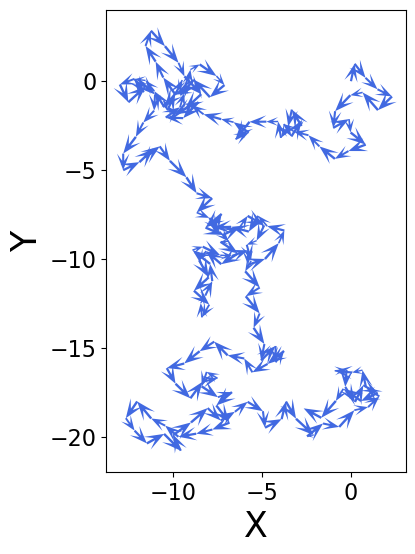

In [116]:
chain_diff = np.diff(chain, axis=1)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot arrows for each link in the chain in 2D
ax.quiver(chain[0, :-1], chain[1, :-1],
          chain_diff[0], chain_diff[1],
          angles='xy', scale_units='xy', scale=1,
          color='royalblue', width=0.008, headwidth=6, headlength=8)

# Set axis labels and customize their font size
ax.set_xlabel('X', fontsize=25)
ax.set_ylabel('Y', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=16)


# Remove grid lines
ax.grid(False)

# Set the aspect ratio to be equal
ax.set_aspect('equal')

# Show the plot
plt.savefig('./randomwalk.jpeg', dpi=300, bbox_inches='tight')